In [24]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [25]:
# Load Data and Preprocess
def load_data(path= "/content/bank-full.csv"):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [27]:
def load_data(path="/content/bank-full.csv"):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(path, sep=';', quotechar='"', on_bad_lines='skip', engine='python')   # <-- FIXED for your file

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]   # TODO: Select features

    # TODO: Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)   # TODO: Apply StandardScaler

    return X_scaled, df


# Load and preprocess the data
X_scaled, data = load_data("/content/bank-full.csv")

print("Data shape:", X_scaled.shape)


Data shape: (20631, 9)


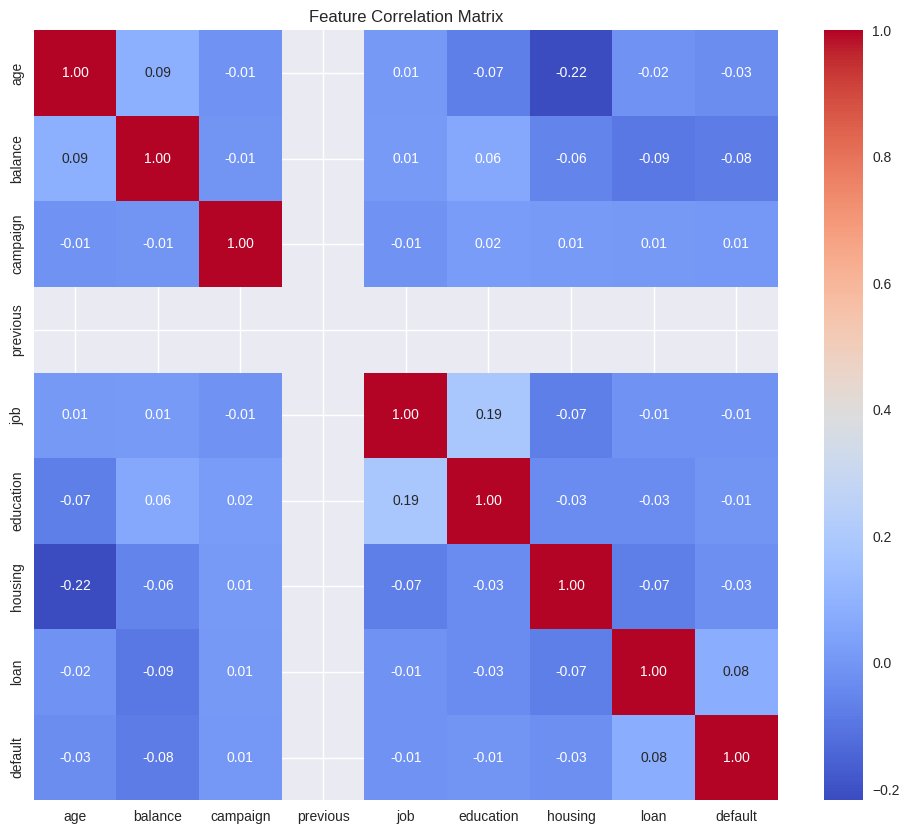

In [32]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = []
        for k in range(self.n_clusters):
            points = X[labels == k]
            if len(points) == 0:
                new_centroids.append(self.centroids[k])
            else:
                new_centroids.append(points.mean(axis=0))
        return np.array(new_centroids)

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)

            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break

            self.centroids = new_centroids

        self.labels = labels
        return self

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


# These are the *exact* 9 features used for clustering
features = ['age', 'balance', 'campaign', 'previous', 'job',
            'education', 'housing', 'loan', 'default']

# Create correlation matrix only for these 9 features
corr = pd.DataFrame(X_scaled, columns=features).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

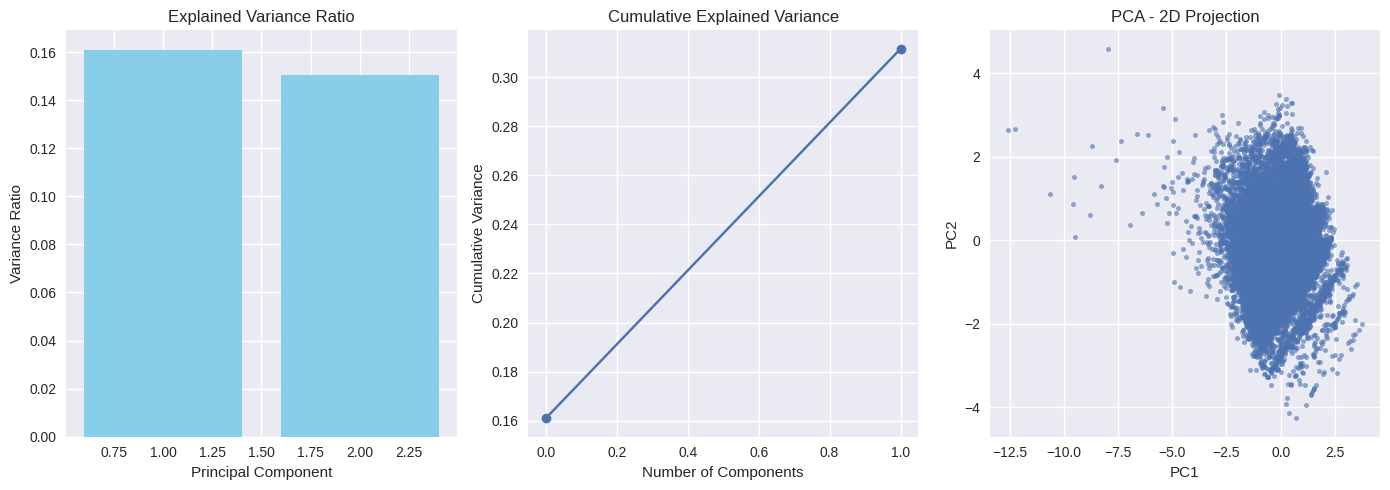

Shape after PCA: (20631, 2)


In [33]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(14, 5))

    # Explained Variance Ratio
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, color='skyblue')
    plt.title("Explained Variance Ratio")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Ratio")

    # Cumulative Explained Variance
    plt.subplot(1, 3, 2)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.title("Cumulative Explained Variance")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Variance")

    # PCA 2D Scatter Plot
    if n_components >= 2:
        plt.subplot(1, 3, 3)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.6)
        plt.title("PCA - 2D Projection")
        plt.xlabel("PC1")
        plt.ylabel("PC2")

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

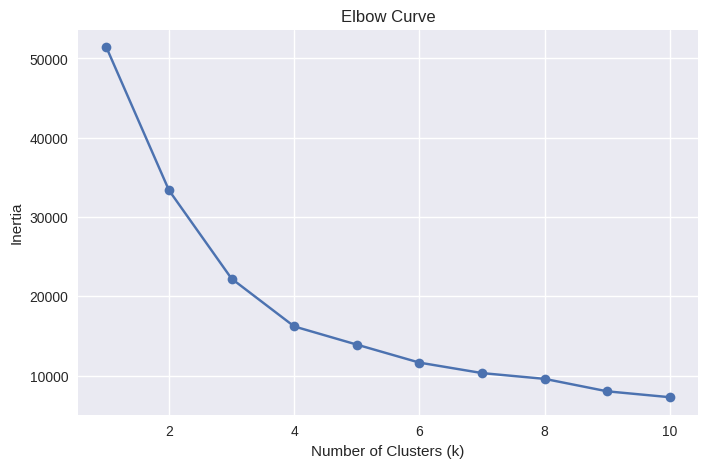

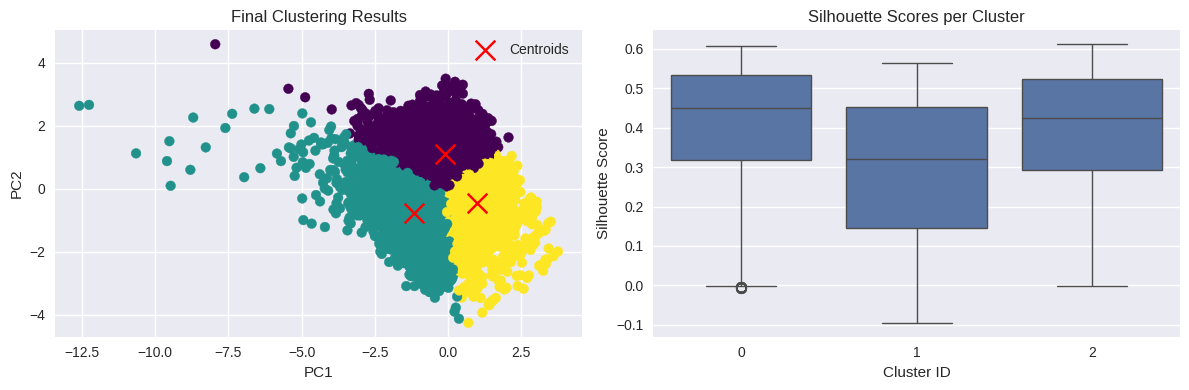

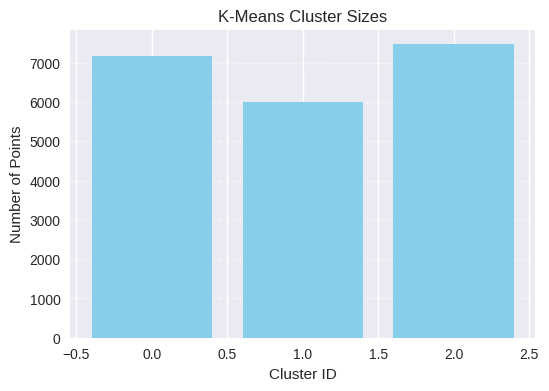


Clustering Evaluation:
Inertia: 22220.88
Silhouette Score: 0.37


In [40]:
from sklearn.metrics import silhouette_samples

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0

    for k in range(centroids.shape[0]):
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[k], axis=1)
            inertia += np.sum(distances ** 2)

    return inertia


def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    for k in K:
        model = KMeansClustering(n_clusters=k)
        model.fit(X)
        inertia_k = calculate_inertia(X, model.labels, model.centroids)
        inertias.append(inertia_k)

    # Create elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertias, marker='o')
    plt.title("Elbow Curve")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

    return inertias


# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering (use k from elbow)
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot evaluation metrics (Silhouette per cluster)
plt.subplot(1, 2, 2)
sil_samples = silhouette_samples(X_pca, kmeans.labels)
sns.boxplot(x=kmeans.labels, y=sil_samples)
plt.title("Silhouette Scores per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()
# K-Means Cluster Size Bar Plot
u, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(u, counts, color='skyblue')
plt.title("K-Means Cluster Sizes")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

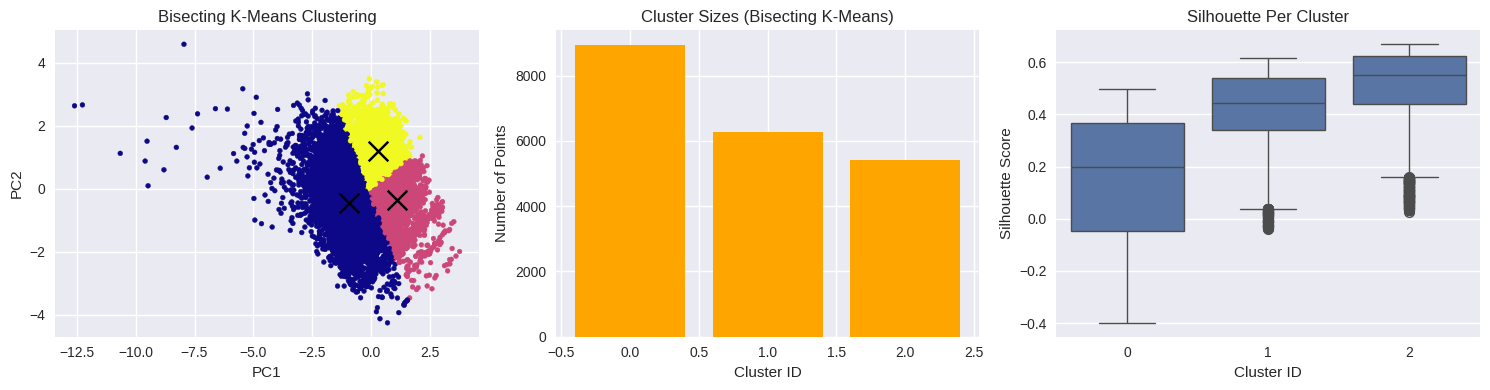


Bisecting K-Means Evaluation:
Silhouette Score: 0.3268220738464345


In [39]:
from sklearn.cluster import KMeans
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        # Start: all points belong to cluster 0
        self.labels_ = np.zeros(X.shape[0], dtype=int)

        # Next new cluster ID to assign
        next_label = 1

        # Continue splitting until we reach desired number of clusters
        while len(np.unique(self.labels_)) < self.n_clusters:

            # 1. Choose cluster to split = largest cluster
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            cluster_to_split = unique_labels[np.argmax(counts)]

            # Get indices for this cluster
            idx = np.where(self.labels_ == cluster_to_split)[0]
            X_subset = X[idx]

            # If cluster has 1 or 0 points, skip splitting
            if len(X_subset) <= 1:
                break

            # 2. Perform KMeans (k=2) on the subset
            km = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = km.fit_predict(X_subset)

            # Two child clusters: 0 and 1 inside the subset
            left_child = cluster_to_split        # keep old label
            right_child = next_label             # assign new label
            next_label += 1

            # 3. Assign labels back to main label array
            # Left child keeps the original label
            self.labels_[idx[sub_labels == 0]] = left_child

            # Right child gets a new label
            self.labels_[idx[sub_labels == 1]] = right_child

            # 4. Store tree + centroids
            self.split_tree[cluster_to_split] = (left_child, right_child)
            self.centers_[left_child] = km.cluster_centers_[0]
            self.centers_[right_child] = km.cluster_centers_[1]

        return self.labels_

# Bisecting K-Means Visualizations

# Run Bisecting KMeans
bkmeans = BisectingKMeans(n_clusters=3, random_state=42)
b_labels = bkmeans.fit_predict(X_pca)

# Convert centroids dictionary to array (sorted by cluster)
b_centroids = np.array([bkmeans.centers_[k] for k in sorted(bkmeans.centers_.keys())])

plt.figure(figsize=(15, 4))

# 1. Scatter Plot with Centroids
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=b_labels, cmap='plasma', s=12)
plt.scatter(b_centroids[:, 0], b_centroids[:, 1], c='black', marker='x', s=200)
plt.title("Bisecting K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

# 2. Cluster Size Bar Plot
plt.subplot(1, 3, 2)
unique, counts = np.unique(b_labels, return_counts=True)
plt.bar(unique, counts, color='orange')
plt.title("Cluster Sizes (Bisecting K-Means)")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")

# 3. Silhouette Distribution per Cluster
plt.subplot(1, 3, 3)
sil_vals = silhouette_samples(X_pca, b_labels)
sns.boxplot(x=b_labels, y=sil_vals)
plt.title("Silhouette Per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Print Evaluation Score
print("\nBisecting K-Means Evaluation:")
print("Silhouette Score:", silhouette_score(X_pca, b_labels))


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!